In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_bloch_multivector
from qiskit.providers.aer import QasmSimulator
from qiskit import execute,Aer
import math

# Peres Gate Experiment

In [3]:
num_qubits = 3

In [4]:
q = QuantumRegister(num_qubits)
c = ClassicalRegister(num_qubits)
qc = QuantumCircuit(q,c)

In [5]:
backend = Aer.get_backend('statevector_simulator')

In [6]:
# setup the initial conditions (flip the bits required for all the boolean conditions to match and activate the circuit)
qc.x(q[0])
qc.x(q[1])
qc.barrier()

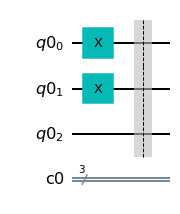

In [7]:
qc.draw("mpl")

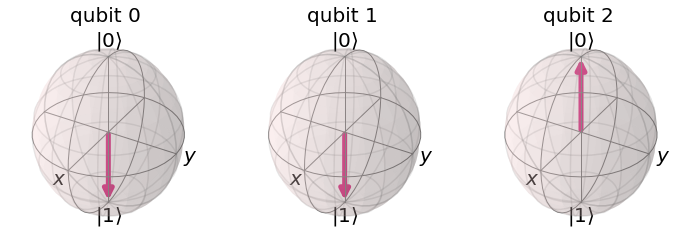

In [8]:
# check initial conditions
plot_bloch_multivector(execute(qc,backend).result().get_statevector())

In [9]:
# create a peres gate
q_peres = QuantumRegister(num_qubits)
qc_peres = QuantumCircuit(q_peres)
qc_peres.ccx(q_peres[0],q_peres[1],q_peres[2])
qc_peres.cnot(q_peres[0],q_peres[1])

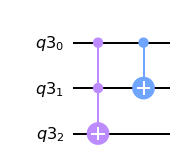

In [10]:
qc_peres.draw("mpl")

In [11]:
peres_gate = qc_peres.to_gate()

In [12]:
# apply the peres gate to the quantum circuit at hand
qc.append(peres_gate,[q[0],q[1],q[2]])

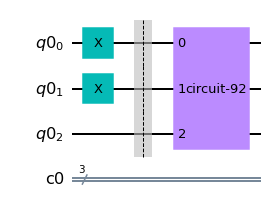

In [13]:
qc.draw("mpl")

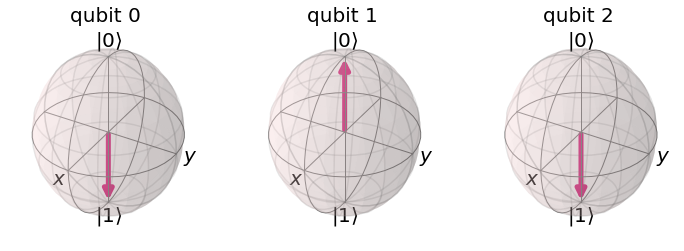

In [14]:
# bloch projection of the final state vector
plot_bloch_multivector(execute(qc,backend).result().get_statevector())

# Quantum OR Gate Experiment

In [15]:
# new quantum circuit
q2 = QuantumRegister(num_qubits)
c2 = ClassicalRegister(num_qubits)
qc2 = QuantumCircuit(q2,c2)

In [16]:
# setup the initial conditions 
#qc2.x(q2[0])
qc2.x(q2[1])
qc2.barrier()

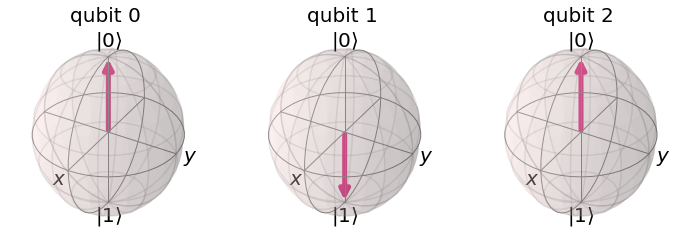

In [17]:
plot_bloch_multivector(execute(qc2,backend).result().get_statevector())

In [18]:
# create the or gate
qc2.append(peres_gate,[q2[0],q2[1],q2[2]])
qc2.cnot(q2[1],q2[2])

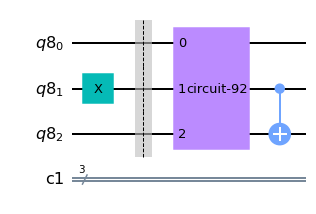

In [19]:
qc2.draw("mpl")

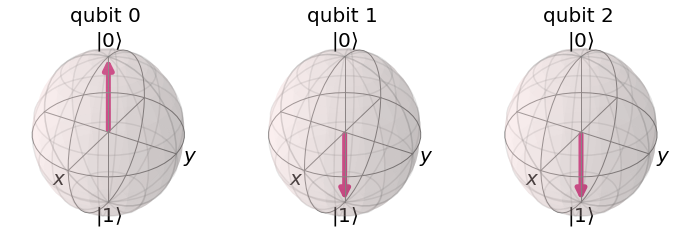

In [20]:
plot_bloch_multivector(execute(qc2,backend).result().get_statevector())